# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

from collections import Counter

import numpy as np

from lisc import Words
from lisc.data import ArticlesAll
from lisc.data.utils import threshold_counter, combine_lists
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values, get_attribute_counts

In [2]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_attrs_by_year

## Setup

In [3]:
# Settings
SAVE_FIG = False

In [4]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/words'
db = SCDB('../data/')

In [5]:
# Set the name of the file to load
name = 'erps' # 'erps', 'test'

In [6]:
# Load the words object
words = load_object('words_' + name, directory=db, reload_results=True)

In [7]:
# Load exclusions for analysis
exclusions = load_txt_file('analysis_exclusions.txt', term_dir, split_elements=False)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [8]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210226-2212m.3',
 'count': '32200710',
 'lastupdate': '2021/02/27 15:01'}

In [9]:
# Check requester object info
words.meta_data.requester

{'n_requests': 457,
 'wait_time': 0.1,
 'start_time': '16:08:58 Sunday 28 February 2021',
 'end_time': '16:40:10 Sunday 28 February 2021',
 'logging': None}

In [10]:
# TEMP: update Articles objects for old collection
for art in words.results:
    art.processed = False

## Data Organization

In [12]:
# Process data to collapse across all articles
words.process_combined_results()

### Check Number of Articles

In [13]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 87


In [14]:
# Check the total number of articles in the collected dataset
n_articles = [data.n_articles for data in words]
total_article_count = sum(n_articles)
print('Number of papers: \t', total_article_count)

Number of papers: 	 30747


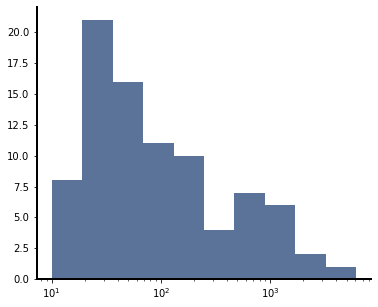

In [15]:
# Plot the histogram of the number of ERP papers collected
plot_count_hist(n_articles, True,
                save_fig=SAVE_FIG, file_name='erp_hist.pdf', directory=figs_dir)

In [17]:
# Collect all the DOIs across all papers
dois = get_all_values(words, 'dois', unique=True)

In [18]:
# Check the number of unique papers, based on DOIs
print('Number of unique DOIs: \t', len(set(dois)))

Number of unique DOIs: 	 21332


In [20]:
# Check how many articles were found per ERP
for data in words.results:
    print(data.label, '\t', data.n_articles)

P100 	 1821
P150 	 217
P170 	 39
P180 	 92
P200 	 843
P220 	 50
P230 	 27
P240 	 31
P250 	 97
P270 	 17
P300 	 6110
P3a 	 1007
P3b 	 1054
P340 	 10
P350 	 72
P400 	 180
P500 	 66
P550 	 16
P600 	 708
N100 	 1020
N110 	 22
N120 	 56
N130 	 40
N140 	 176
N150 	 120
N160 	 64
N170 	 1357
N180 	 38
N190 	 23
N200 	 769
N2a 	 174
N2b 	 233
N2c 	 35
N2pc 	 497
N240 	 19
N250 	 265
N270 	 66
N280 	 23
N290 	 51
N300 	 195
N320 	 25
N350 	 83
N400 	 2555
N450 	 177
N550 	 52
N600 	 16
N700 	 18
MMN 	 3601
LPC 	 641
NSW 	 102
PSW 	 111
VPP 	 57
CNV 	 1004
PINV 	 32
ELAN 	 33
LAN 	 54
CPS 	 37
LRP 	 300
LDN 	 35
ORN 	 37
BP 	 521
ERN 	 1017
Pe 	 301
CRN 	 92
MFN 	 94
SPeN 	 122
FRN 	 574
Pd 	 22
EDAN 	 22
LDAP 	 15
ADAN 	 29
EPN 	 235
SN 	 76
SP 	 33
SPN 	 19
SPCN 	 41
PCN 	 62
VsEP 	 193
MRPC 	 297
FSP 	 20
pN 	 23
LPN 	 28
LPP 	 23
EFN 	 10
FN400 	 165
PMN 	 12
VAN 	 31


## Check Attribute Counts

In [21]:
# Define a list of attributes to check
attrs = ['words', 'keywords', 'authors', 'journals', 'dois', 'titles', 'years']

In [22]:
# Check the proportion of papers, for each attribute, that has data
print('Attribute counts (total # articles: {}):'.format(total_article_count))
for attr in attrs:
    count = get_attribute_counts(words, attr)
    print('    {:5d} articles ({:6.2f} %) have {}.'.format(\
        count, count / total_article_count * 100, attr))

Attribute counts (total # articles: 30747):
    30241 articles ( 98.35 %) have words.
    10002 articles ( 32.53 %) have keywords.
    30726 articles ( 99.93 %) have authors.
    30747 articles (100.00 %) have journals.
    28524 articles ( 92.77 %) have dois.
    30747 articles (100.00 %) have titles.
    30747 articles (100.00 %) have years.


### Check Years of Publication

In [23]:
# Get global count of authors 
years = set(get_all_values(words, 'years'))
min_year, max_year = min(years), max(years)

In [24]:
# Print out summary of the year range of publications
print('Collected papers were published between the years: {}-{}'.format(min_year, max_year))

Collected papers were published between the years: 1963-2021


In [26]:
# Get the count of articles per year, and drop 2021 (incomplete year)
year_counts = get_all_counts(words, 'years', combine=True)
year_counts.pop(2021);

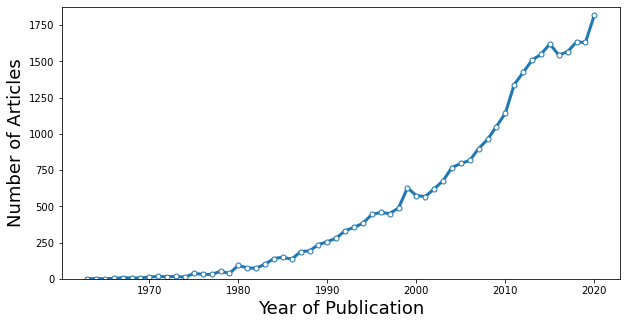

In [27]:
# Plot the total number of articles, across components, per year
plot_years(year_counts)

### Check Authors across all papers

In [28]:
# Get global count of authors 
author_counts = get_all_counts(words, 'authors', combine=True)

In [29]:
# Check the number of unique authors
print('Total number of authors   :\t {:5d}'.format(len(author_counts)))
print('Number of authors > 10   :\t {:5d}'.format(len(threshold_counter(author_counts, 10))))
print('Number of authors > 100  :\t {:5d}'.format(len(threshold_counter(author_counts, 100))))

Total number of authors   :	 45324
Number of authors > 10   :	  2359
Number of authors > 100  :	    31


In [30]:
# Check the most common authors
print('Most common authors:')
for (author, count) in author_counts.most_common(10):
    print('    {:15s} \t {}'.format(' '.join(author), count))

Most common authors:
    Näätänen R      	 330
    Wang Y          	 254
    Schröger E      	 196
    Zhang Y         	 186
    Polich J        	 184
    Holcomb PJ      	 179
    Li H            	 172
    Friederici AD   	 168
    Wang L          	 164
    Li Y            	 156


### Check Journals across all papers

In [31]:
# Get global count of journals
journals_counts = get_all_counts(words, 'journals', combine=True)

In [32]:
# Check the number of unique authors
print('Total number of journals  :\t {:5d}'.format(len(journals_counts)))
print('Number of journals > 10   :\t {:5d}'.format(len(threshold_counter(journals_counts, 10))))
print('Number of journals > 100  :\t {:5d}'.format(len(threshold_counter(journals_counts, 100))))

Total number of journals  :	  2301
Number of journals > 10   :	   344
Number of journals > 100  :	    48


In [33]:
# Check the most common journals
print('Most common journals:')
for (journal, count) in journals_counts.most_common(10):
    print('    {:55s} \t {}'.format(journal.split(':')[0], count))

Most common journals:
    Psychophysiology                                        	 1481
    International journal of psychophysiology               	 1132
    Neuropsychologia                                        	 983
    Clinical neurophysiology                                	 934
    Biological psychology                                   	 898
    Brain research                                          	 803
    Neuroreport                                             	 720
    Journal of cognitive neuroscience                       	 708
    PloS one                                                	 679
    Electroencephalography and clinical neurophysiology     	 663


### Keywords

In [34]:
# Get global count of authors 
kw_counts = get_all_counts(words, 'keywords', combine=True)

In [35]:
# Check the number of unique keywords
print('Total number of keywords   :\t {:5d}'.format(len(kw_counts)))
print('Number of keywords > 10    :\t {:5d}'.format(len(threshold_counter(kw_counts, 10))))
print('Number of keywords > 100   :\t {:5d}'.format(len(threshold_counter(kw_counts, 100))))

Total number of keywords   :	 14350
Number of keywords > 10    :	   678
Number of keywords > 100   :	    37


In [36]:
# Check the most common keywords across all components
print('Most common keywords:')
for (kw, count) in kw_counts.most_common(10):
    print('    {:20s} \t {}'.format(kw, count))

Most common keywords:
    event-related potentials 	 1357
    erp                  	 1088
    eeg                  	 939
    erps                 	 722
    attention            	 620
    event-related potential 	 535
    p300                 	 442
    schizophrenia        	 391
    emotion              	 333
    electroencephalography 	 309


In [37]:
# Check most common keywords per component
for data in words.combined_results:
    data.check_frequencies('keywords', n_check=5)

P100  : visual evoked potential, visual evoked potentials, event-related potentials, n170, eeg
P150  : event-related potentials, pregabalin, aging, metabolomics, erps
P170  : congenital hypothyroidism, iodine diet, psychiatric diseases, thyroid hormones, attention
P180  : transcranial magnetic stimulation, tms-eeg, electroencephalography, metabolomics, targeted metabolomics
P200  : event-related potentials, erp, erps, n400, eeg
P220  : cause-specific infant mortality, maternal education, maternal employment, paternal education, paternal employment
P230  : adipose tissue, arcuate nucleus of the hypothalamus, early-life stress, microglia, neuroinflammation
P240  : eeg, somatosensory cortex, touch, chinese three-character verb–object metaphor, contextual effect
P250  : erps, mlpa, n170, p100, velocardiofacial syndrome
P270  : directed transfer function/adaptive directed transfer function, stereoscopic depth, visual discomfort, visual evoked potential, face
P300  : event-related potentials

### Abstract Words

In [40]:
# Get global count of words 
word_counts = get_all_counts(words, 'words', combine=True)

In [41]:
# Check the number of unique words
print('Total number of words   :\t {:5d}'.format(len(word_counts)))
print('Number of words > 100   :\t {:5d}'.format(len(threshold_counter(word_counts, 100))))
print('Number of words > 1000  :\t {:5d}'.format(len(threshold_counter(word_counts, 1000))))

Total number of words   :	 93936
Number of words > 100   :	  4208
Number of words > 1000  :	   702


In [42]:
# Check the most common keywords across all components
print('Most common words:')
for (word, count) in word_counts.most_common(10):
    print('    {:20s} \t {}'.format(word, count))

Most common words:
    processing           	 24781
    patients             	 23547
    amplitude            	 19241
    study                	 18884
    task                 	 18095
    results              	 17999
    stimuli              	 17609
    erp                  	 16891
    potentials           	 16329
    event-related        	 15639


In [43]:
# Check most common words
for data in words.combined_results:
    data.check_frequencies('words', n_check=5)

P100  : visual, patients, vep, latency, evoked
P150  : patients, group, cells, study, two
P170  : control, components, potentials, early, visual
P180  : cells, patients, cortex, study, cortical
P200  : patients, processing, p300, amplitude, erp
P220  : cells, de, amplitude, potentials, components
P230  : ms, components, differences, stimuli, visual
P240  : amplitude, stimuli, potentials, stimulus, processing
P250  : patients, processing, components, amplitude, task
P270  : stimuli, stimulus, stimulation, amplitude, components
P300  : patients, amplitude, study, latency, cognitive
P3a   : patients, stimuli, auditory, p3b, processing
P3b   : task, processing, stimuli, p3a, amplitude
P340  : pain, seps, patients, potentials, training
P350  : erps, erp, processing, stimuli, components
P400  : faces, infants, stimuli, amplitude, processing
P500  : p, different, erp, subjects, study
P550  : subjects, task, sounds, larger, group
P600  : processing, syntactic, semantic, sentences, n400
N100  :

## Check Values by Year

In [44]:
# Extract lists of all values for attributes of interest
all_years = get_all_values(words, 'years')
all_journals = get_all_values(words, 'journals')
all_authors = get_all_values(words, 'authors')

In [45]:
# Collect the number of unique journals & authors by year
journals_by_year = {}
authors_by_year = {}
for year in range(min_year, max_year):
    inds = np.where(np.array(all_years) == year)[0]
    journals_by_year[year] = len(set(np.array(all_journals)[inds]))
    authors_by_year[year] = len(set(combine_lists([all_authors[ind] for ind in inds])))

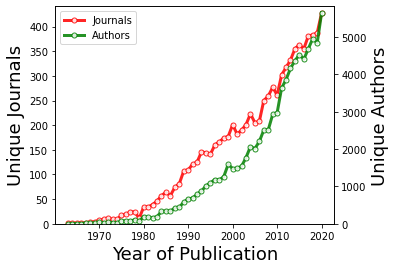

In [46]:
# Plot unique journals & authors by year
plot_attrs_by_year(journals_by_year, authors_by_year)

## Example Component Summaries

In [48]:
# Check an example summary
ind = 19
words.combined_results[ind].create_summary()
words.combined_results[ind].print_summary()

N100 :
  Number of articles: 		 1020
  First publication: 		 1980
  Most common author: 		 Boutros NN
    number of publications: 	 33
  Most common journal: 		 Clinical neurophysiology : official journal of the International Federation of Clinical Neurophysiology
    number of publications: 	 55 



### WordCloud Plots

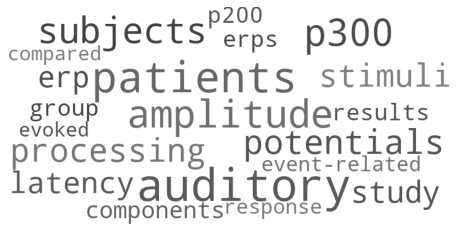

In [49]:
# Create a wordcloud
plot_wordcloud(words.combined_results[ind].words, 20)

### Data Plots

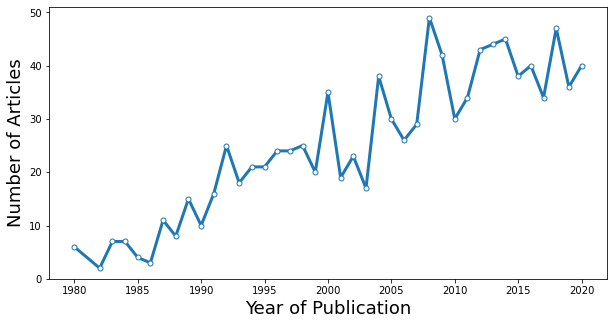

In [50]:
# Check an example history plot
plot_years(words.combined_results[ind].years, [None, 2020])